# Fichier blockchain_by_actor.csv
Ce fichier contient des séries temporelles décrivant les 100 acteurs ayant la plus grande activité (définie en nombre de jours d'activité) sur la période.

* `identity` : Identifiant de l'acteur, pouvant être un nom ou un numéro unique

* `received` : Total des montants reçu

* `spent` : Total des montants versé

* `nb_received` : Nombre de sorties de transactions reçues par l'acteur

* `nb_transactions` : Nombres de transactions faites par l'acteur

* `nb_spent` : Nombre de paiements faits par l'acteur (1 transaction = 1 ou plusieurs paiements).

* `sum_fee` : Total des frais de transactions payés par l'acteur pour les transactions dont il est la source

* `mean_fee_for100` : Moyenne des frais payés par transaction

* `self_spent` : Montants observés comme envoyés de l'acteur à lui-même

* `self_spent_estimated` : Montants estimés comme probable envoie de l'acteur à lui-même, mais vers des adresses que nous ne connaissons pas. Cette valuer est forcément supérieure à self_spent.

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv('timeseries/blockchain_by_actor.csv')

In [101]:
df = df.drop(columns=['Unnamed: 0'])

In [102]:
# display random sample of 5 rows

df.sample(5)


,year,month,day,identity,received,nb_received,date,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent
86717,2017.0,5.0,23.0,CoinGaming.io,1.652563e+10,1265.0,2017-05-23,51025937.0,1.249257,12.0,1.567790e+10,1.477009e+07,1.477009e+07,21.0,1.566313e+10
36787,2016.0,1.0,8.0,BitcoinFog,1.009815e+09,21.0,2016-01-08,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
12988,2015.0,5.0,14.0,74278522,2.547634e+09,11.0,2015-05-14,90000.0,0.011304,9.0,2.558588e+09,0.000000e+00,0.000000e+00,18.0,2.558588e+09
43226,2016.0,3.0,13.0,Bter.com,1.280524e+10,323.0,2016-03-13,1143480.0,0.126834,90.0,1.396954e+10,2.355455e+09,2.355455e+09,180.0,1.161409e+10
40866,2016.0,2.0,18.0,SafeDice.com,2.218082e+08,75.0,2016-02-18,299407.0,0.321031,19.0,4.756363e+08,1.587211e+07,1.587211e+07,38.0,4.597642e+08


In [103]:
# drop rows where year is 0
df = df[df['year'] != 0]

In [104]:
# The number of unique actors
len(df['identity'].unique())

100

In [105]:
# all unique idenity elements which have a "." in their name
actors_by_country = df[df['identity'].str.contains('\.')]['identity'].unique()
actors_by_country


array(['HappyCoins.com', 'FortuneJack.com', 'SatoshiMines.com',
       'Rollin.io', 'SatoshiDice.com', 'Loanbase.com', 'Bitstamp.net',
       'Paymium.com', 'YoBit.net', 'FYBSG.com', 'Poloniex.com',
       'Bitbond.com', 'ePay.info_CoinJoinMess', 'HolyTransaction.com',
       'SlushPool.com', 'BTCJam.com', 'Matbea.com', 'TheRockTrading.com',
       'Huobi.com', 'HaoBTC.com', 'SafeDice.com', 'CoinSpot.com.au',
       'CoinMotion.com', 'Xapo.com', 'CoinGaming.io', 'OKCoin.com',
       'BitZillions.com', 'SecondsTrade.com', '999Dice.com', 'BX.in.th',
       'SimpleCoin.cz', 'BTC-e.com', 'PocketDice.io', 'BitBargain.co.uk',
       'Bter.com', 'BtcTrade.com', 'Cryptonator.com', 'BTCC.com',
       'CoinPayments.net', 'CoinCafe.com',
       'CoinTrader.net_LocalBitcoins.com', 'LuckyB.it',
       'MercadoBitcoin.com.br', 'Bitcoin.de', 'CoinJar.com', 'Bit-x.com',
       'Vaultoro.com'], dtype=object)

In [106]:
# Find the identity who has the most spent sum
df.groupby('identity')['spent'].sum().sort_values(ascending=False).head(10)


identity
ePay.info_CoinJoinMess              1.169524e+15
Huobi.com                           7.794348e+14
Bitstamp.net                        4.153298e+14
Poloniex.com                        3.643295e+14
BTCC.com                            2.694767e+14
CoinTrader.net_LocalBitcoins.com    2.630507e+14
BTC-e.com                           2.569457e+14
OKCoin.com                          1.533042e+14
Xapo.com                            1.381389e+14
107                                 1.366241e+14
Name: spent, dtype: float64

In [107]:
# Find the identity who has the most received sum
df.groupby('identity')['received'].sum().sort_values(ascending=False).head(10)


identity
Huobi.com                           1.313671e+15
ePay.info_CoinJoinMess              1.188925e+15
Bitstamp.net                        6.997821e+14
BTC-e.com                           5.370579e+14
OKCoin.com                          4.589288e+14
Poloniex.com                        4.333840e+14
BTCC.com                            3.220673e+14
CoinTrader.net_LocalBitcoins.com    3.136092e+14
107                                 2.756361e+14
Xapo.com                            2.360818e+14
Name: received, dtype: float64

In [108]:
# Find the identity who has the most nb_transactions
df.groupby('identity')['nb_transactions'].sum().sort_values(ascending=False).head(10)


identity
0                         4403082.0
ePay.info_CoinJoinMess    2310681.0
Xapo.com                  1877020.0
Huobi.com                 1765905.0
LuckyB.it                 1418674.0
61                         346390.0
57                         326671.0
BitZillions.com            321328.0
71554939                   287939.0
Poloniex.com               251594.0
Name: nb_transactions, dtype: float64

In [109]:
# Find the identity who has the most nb_received
df.groupby('identity')['nb_received'].sum().sort_values(ascending=False).head(10)


identity
0                                   19925436.0
ePay.info_CoinJoinMess              18426297.0
Xapo.com                            11963430.0
Huobi.com                            4409112.0
61                                   3638771.0
Poloniex.com                         3213211.0
LuckyB.it                            2771043.0
BTC-e.com                            2631193.0
421                                  1360836.0
CoinTrader.net_LocalBitcoins.com     1297272.0
Name: nb_received, dtype: float64

<Axes: xlabel='date'>

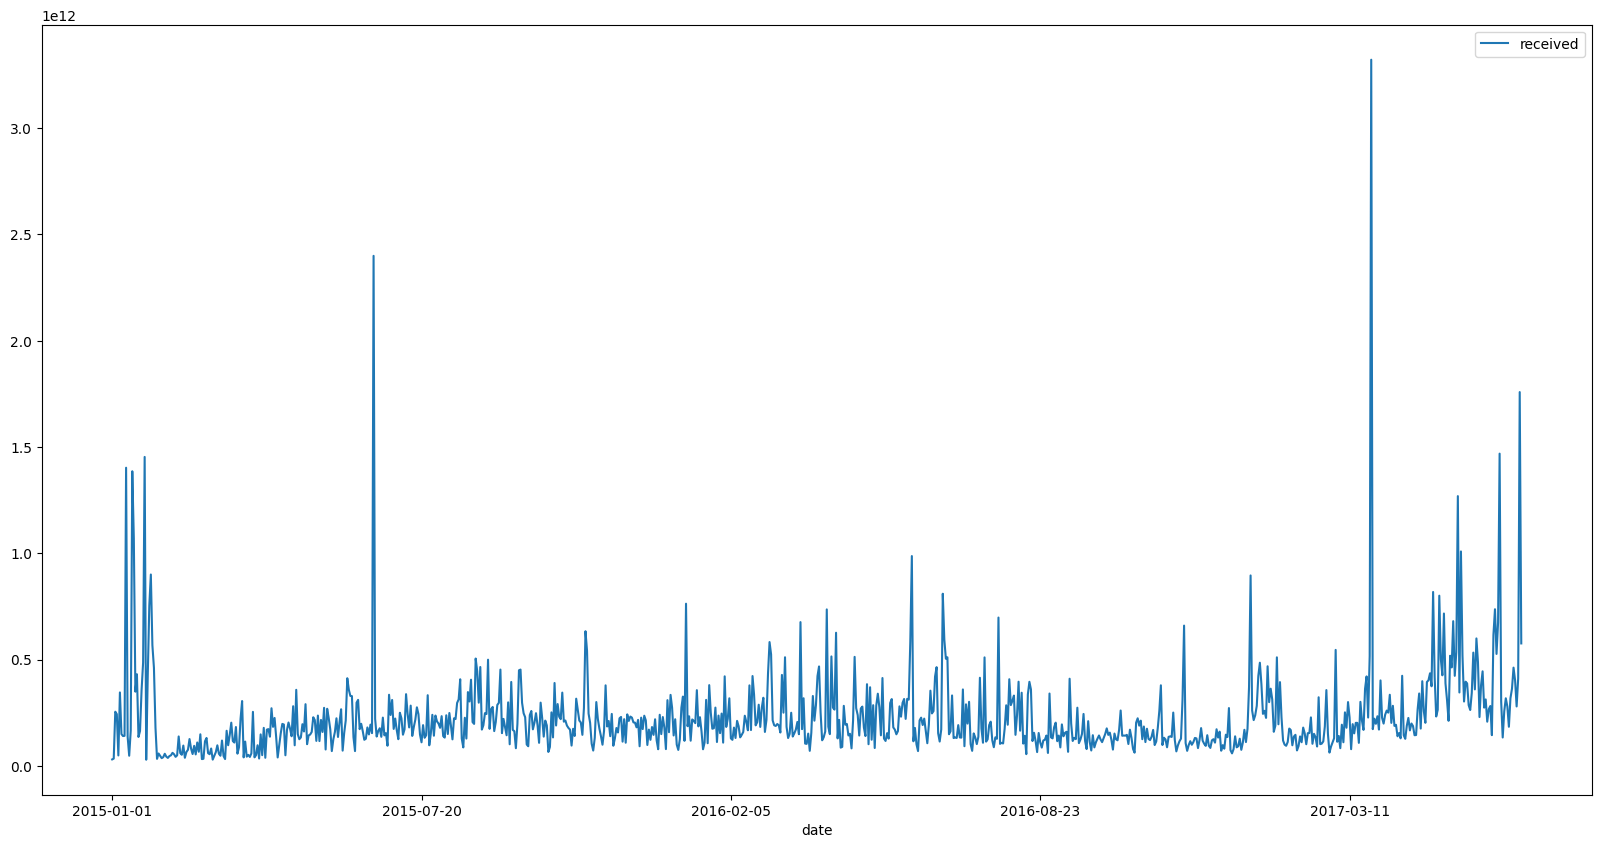

In [110]:
# make a diagram with the date colum as x-axis and the received as y-axis for identity "0"
df[df['identity'] == '0'].plot(x='date', y='received', figsize=(20,10))




## Quels sont les montants moyens des transactions ? Y a t il des schémas récurrents dans les montants des transactions ?


In [111]:
# what is the mean "received" for each identity per month
df.groupby(['identity', 'month'])['received'].mean()



identity                month
0                       1.0      2.960100e+11
                        2.0      1.480656e+11
                        3.0      2.222946e+11
                        4.0      2.108262e+11
                        5.0      2.980493e+11
                                     ...     
ePay.info_CoinJoinMess  8.0      1.530745e+12
                        9.0      1.542821e+12
                        10.0     8.762696e+11
                        11.0     9.119574e+11
                        12.0     1.155848e+12
Name: received, Length: 1200, dtype: float64

## Quels sont les frais moyens de transaction ? 



In [112]:
# compute the mean sum_fee per identity divided by nb_transactions
# this is the average fee per transaction
mean_fee_per_actor = df.groupby('identity')['sum_fee'].sum() / df.groupby('identity')['nb_transactions'].sum()

# now let's compute the average fee on mean_fee_per_actor
mean_fee_per_actor.mean()
#1 SATS = 0.0002804 USD

# now we convert this in dollars
mean_transaction_fee = mean_fee_per_actor.mean() * 0.0002804
mean_transaction_fee





21.56862045383359

## Comment ces frais évoluent-ils au fil du temps ?

<Axes: xlabel='date'>

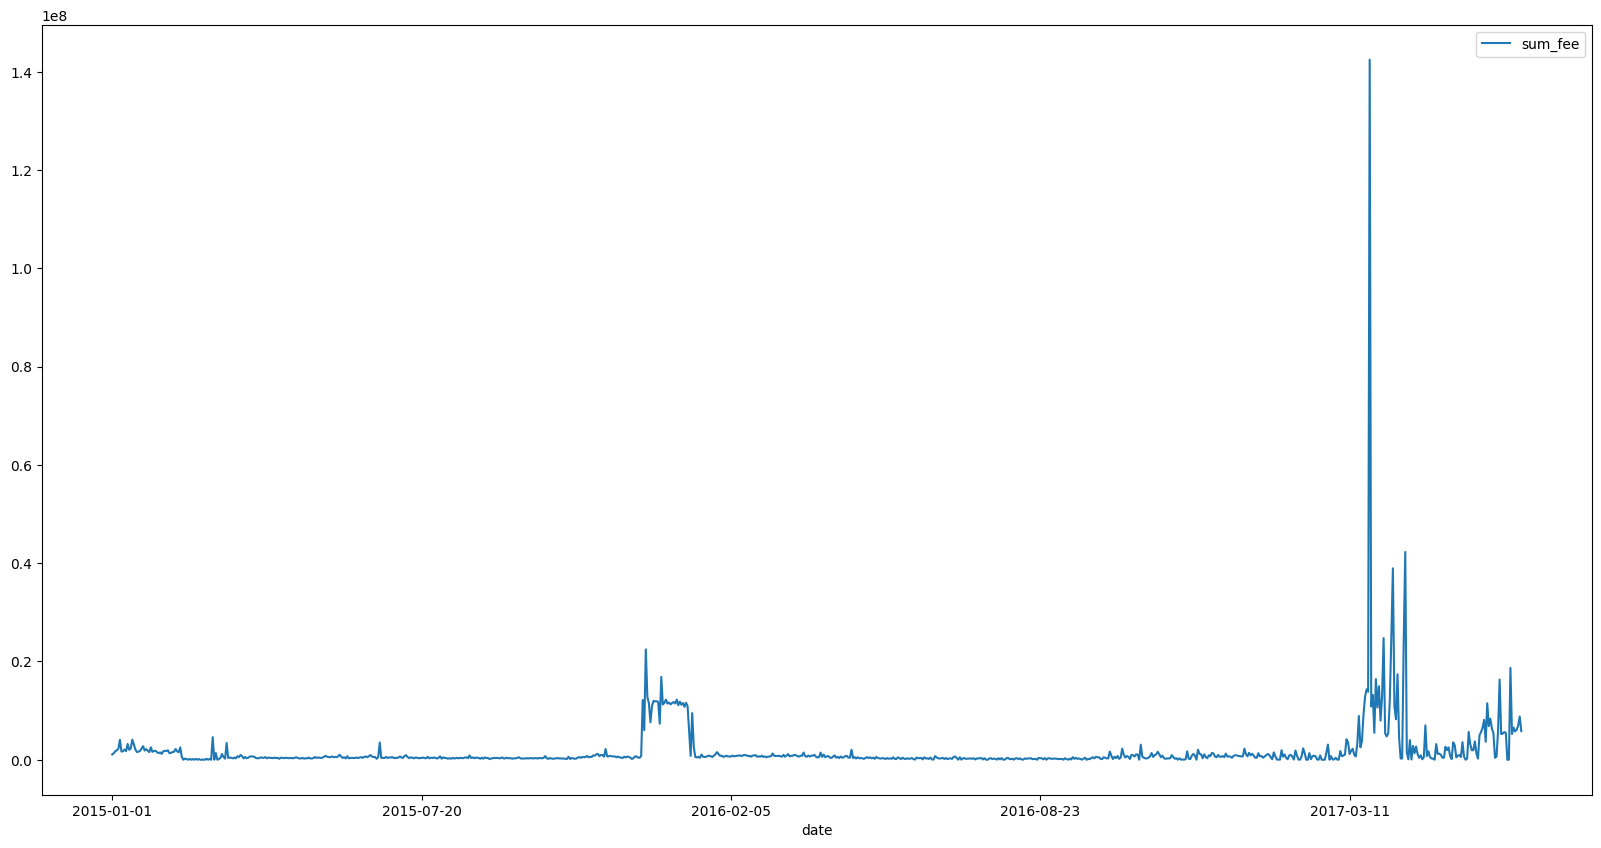

In [126]:
# how do the fees change over time for identity "SafeDice.com"
df[df['identity'] == 'Bter.com'].plot(x='date', y='sum_fee', figsize=(20,10))




## Y a-t-il des adresses qui effectuent des transactions plus fréquentes que d'autres ? 